# Diabetes Prediction

## **Exploratory Data Analysis**

In [100]:
# Importing the packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [101]:
df = pd.read_csv(r'C:\Users\jeeri\OneDrive\Documents\01testproject\diabetes.csv')


In [102]:
# Printing the first 5 rows of the dataframe.
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [103]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


#### The dataset consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [104]:
# Descriptive statistics of the data set
df.describe()

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [105]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (2768, 10)


In [106]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.606936
1    34.393064
Name: count, dtype: float64

In [107]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

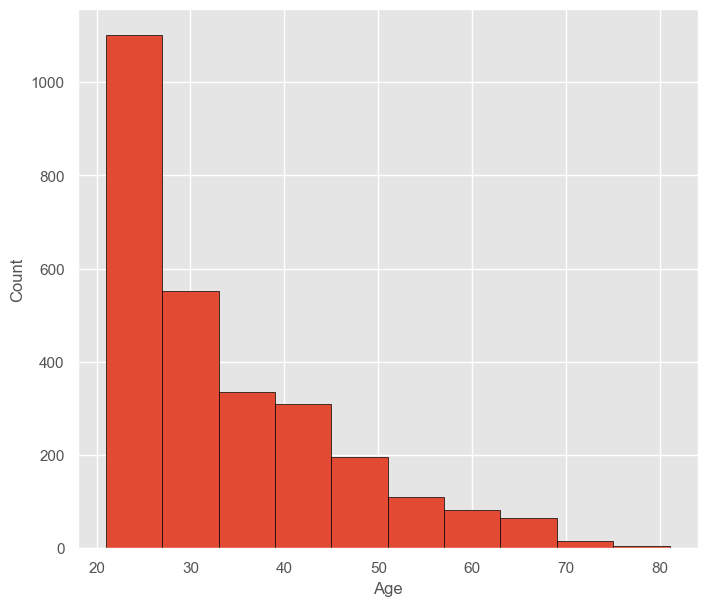

In [108]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "black");

In [109]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

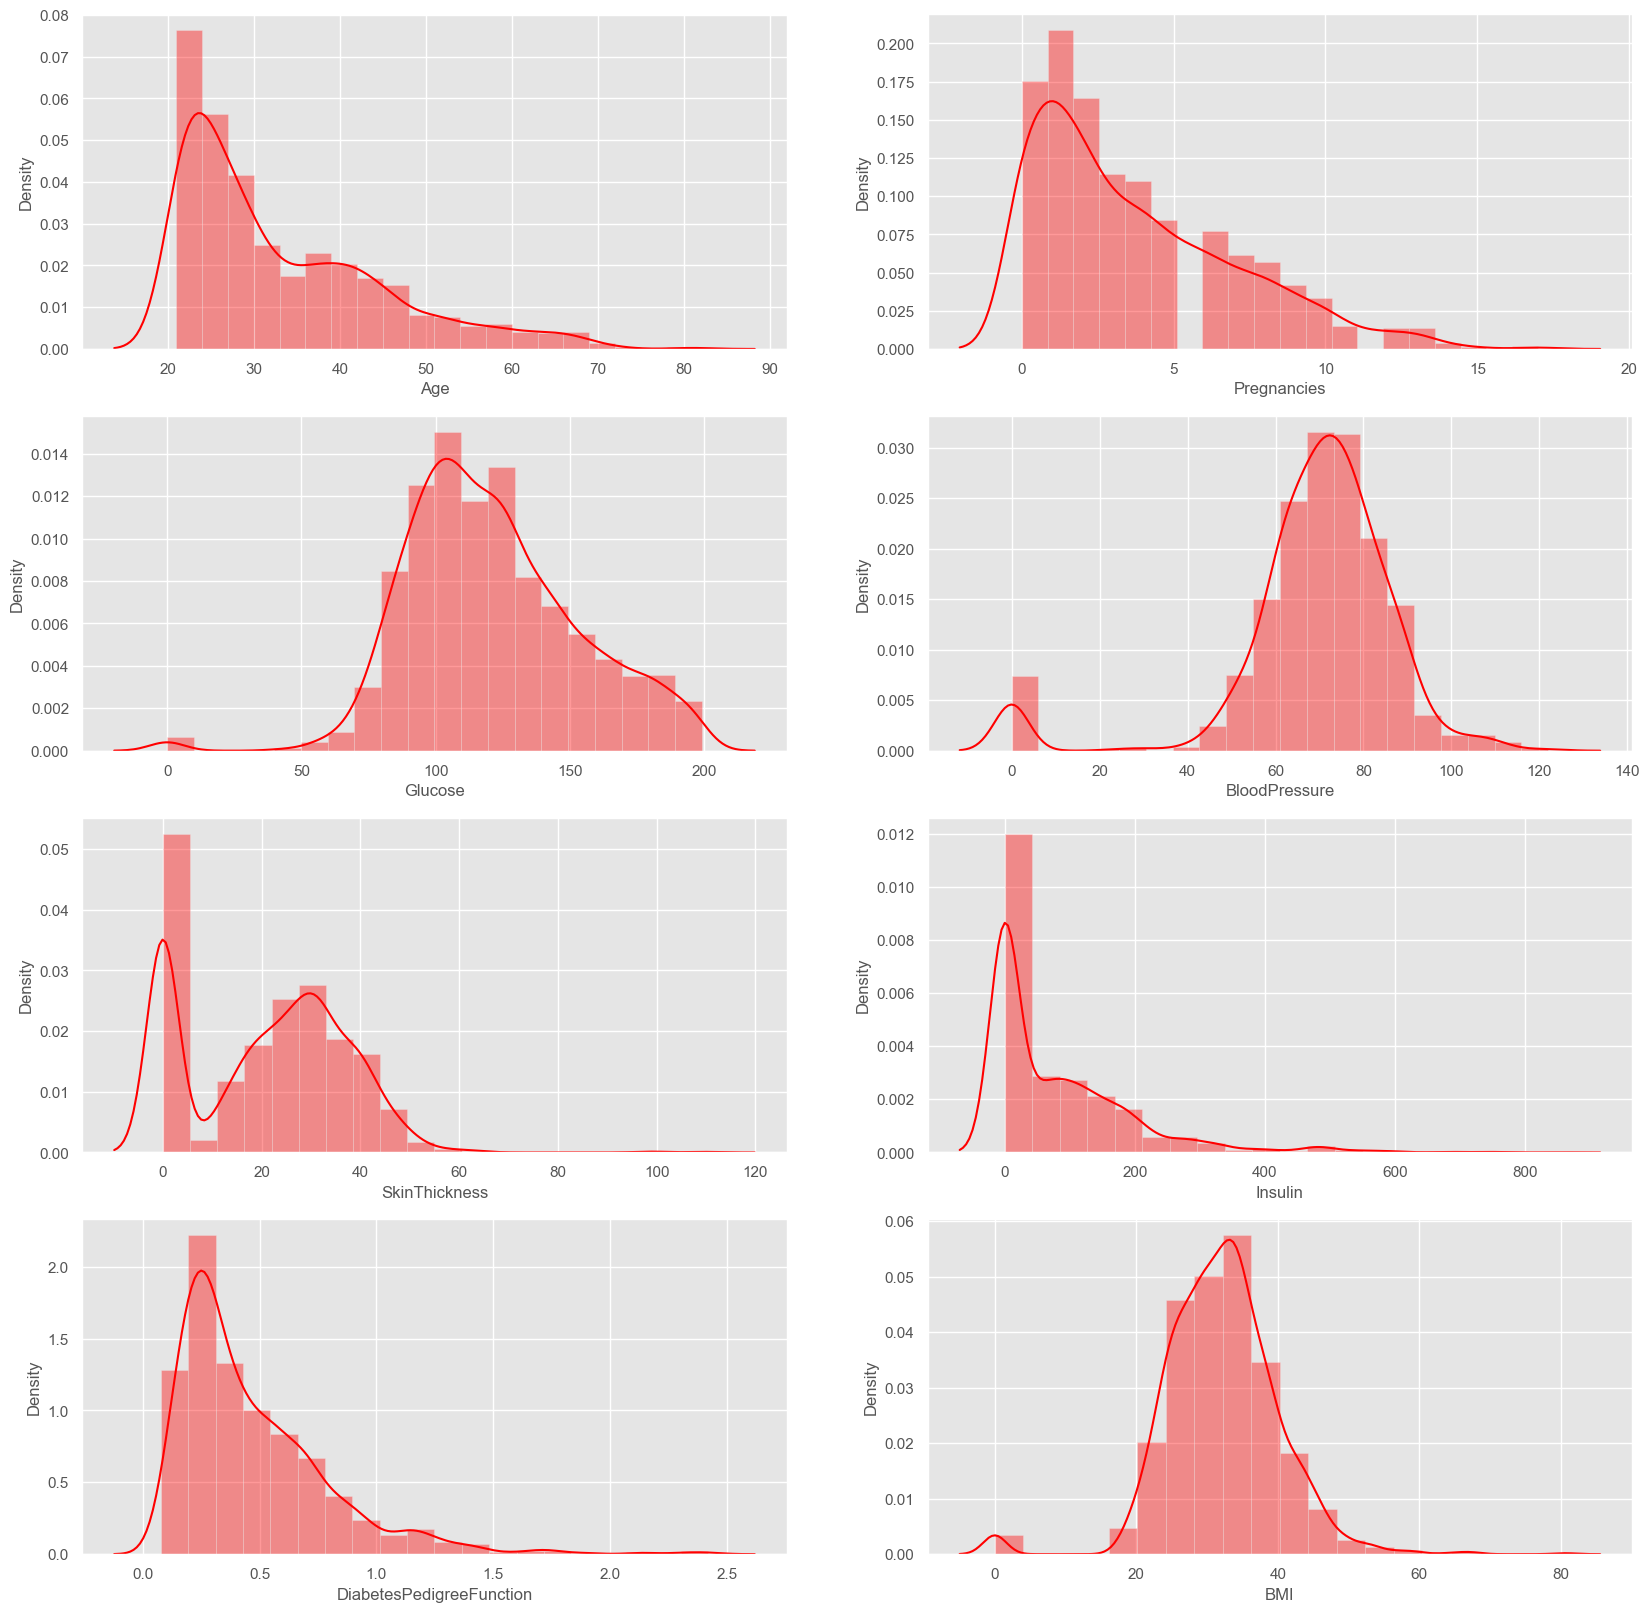

In [110]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Age, bins = 20, ax=ax[0,0], color="red") 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1], color="red") 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0], color="red") 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1], color="red") 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red") 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1], color="red")

In [111]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

Pregnancies
Outcome             
0           3.204295
1           4.769958

In [112]:
df.groupby("Outcome").agg({"Age":"mean"})

Age
Outcome           
0        31.111233
1        36.987395

In [113]:
df.groupby("Outcome").agg({"Age":"max"})

Age
Outcome     
0         81
1         70

In [114]:
df.groupby("Outcome").agg({"Insulin": "mean"})

Insulin
Outcome           
0        70.075991
1        99.302521

In [115]:
df.groupby("Outcome").agg({"Insulin": "max"})

Insulin
Outcome         
0            744
1            846

In [116]:
df.groupby("Outcome").agg({"Glucose": "mean"})

Glucose
Outcome            
0        110.419604
1        141.481092

In [117]:
df.groupby("Outcome").agg({"Glucose": "max"})

Glucose
Outcome         
0            197
1            199

In [118]:
df.groupby("Outcome").agg({"BMI": "mean"})

BMI
Outcome           
0        30.494989
1        35.270378

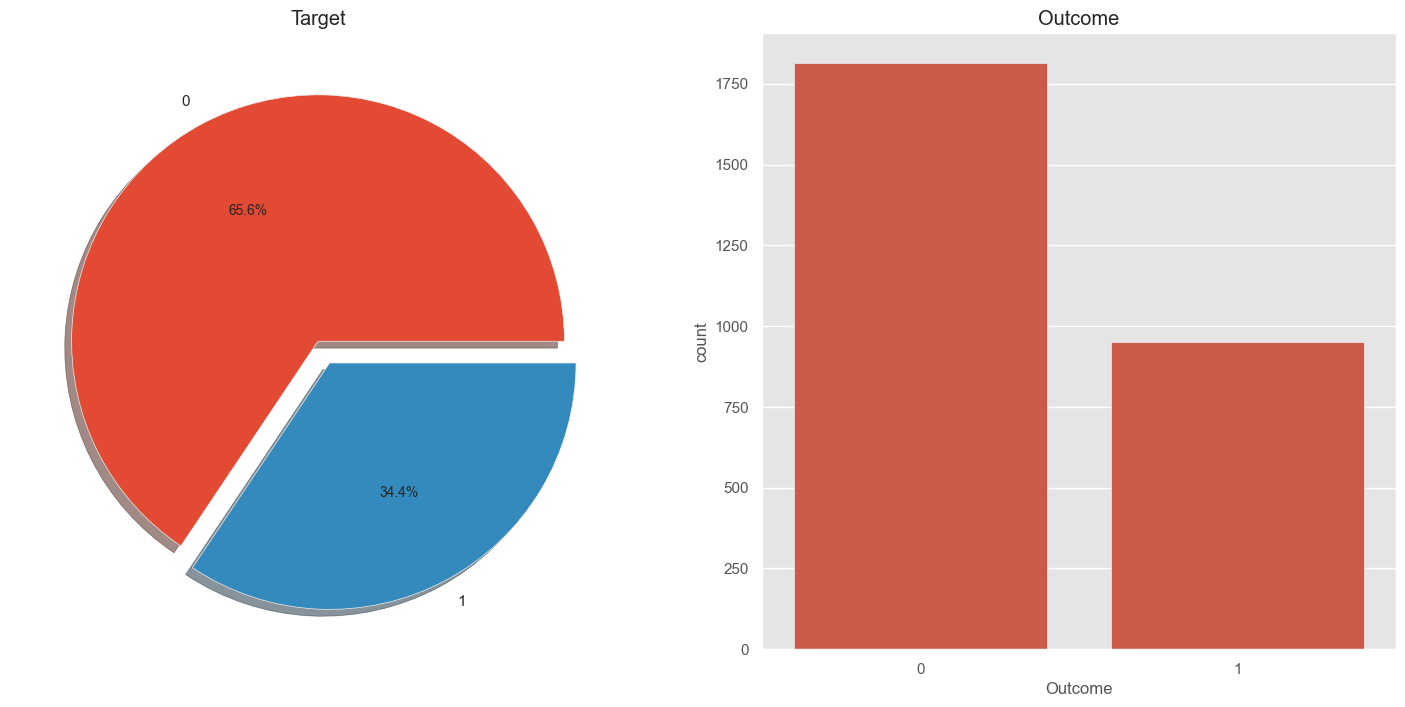

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Bar plot (Fixing the issue)
sns.countplot(x='Outcome', data=df, ax=ax[1])  # <-- Explicitly using x='Outcome'

ax[1].set_title('Outcome')

plt.show()


In [120]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df.corr()

Id  Pregnancies   Glucose  BloodPressure  \
Id                        1.000000    -0.024222  0.015010       0.009717   
Pregnancies              -0.024222     1.000000  0.122839       0.147253   
Glucose                   0.015010     0.122839  1.000000       0.142095   
BloodPressure             0.009717     0.147253  0.142095       1.000000   
SkinThickness             0.017702    -0.068673  0.061023       0.201167   
Insulin                   0.007359    -0.075734  0.323445       0.087823   
BMI                       0.024007     0.018761  0.225308       0.281560   
DiabetesPedigreeFunction -0.009695    -0.027731  0.127195       0.048471   
Age                      -0.007404     0.540805  0.256958       0.238684   
Outcome                  -0.006298     0.223796  0.460644       0.072900   

                          SkinThickness   Insulin       BMI  \
Id                             0.017702  0.007359  0.024007   
Pregnancies                   -0.068673 -0.075734  0.018761   
Glucose                        0.061023  0.323445  0.225308   
BloodPressure                  0.201167  0.087823  0.281560   
SkinThickness                  1.000000  0.445345  0.393494   
Insulin                        0.445345  1.000000  0.215926   
BMI                            0.393494  0.215926  1.000000   
DiabetesPedigreeFunction       0.179830  0.190500  0.129766   
Age                           -0.111895 -0.073458  0.038175   
Outcome                        0.075603  0.123646  0.280928   

                          DiabetesPedigreeFunction       Age   Outcome  
Id                                       -0.009695 -0.007404 -0.006298  
Pregnancies                              -0.027731  0.540805  0.223796  
Glucose                                   0.127195  0.256958  0.460644  
BloodPressure                             0.048471  0.238684  0.072900  
SkinThickness                             0.179830 -0.111895  0.075603  
Insulin                                   0.190500 -0.073458  0.123646  
BMI                                       0.129766  0.038175  0.280928  
DiabetesPedigreeFunction                  1.000000  0.028544  0.160664  
Age                                       0.028544  1.000000  0.237050  
Outcome                                   0.160664  0.237050  1.000000

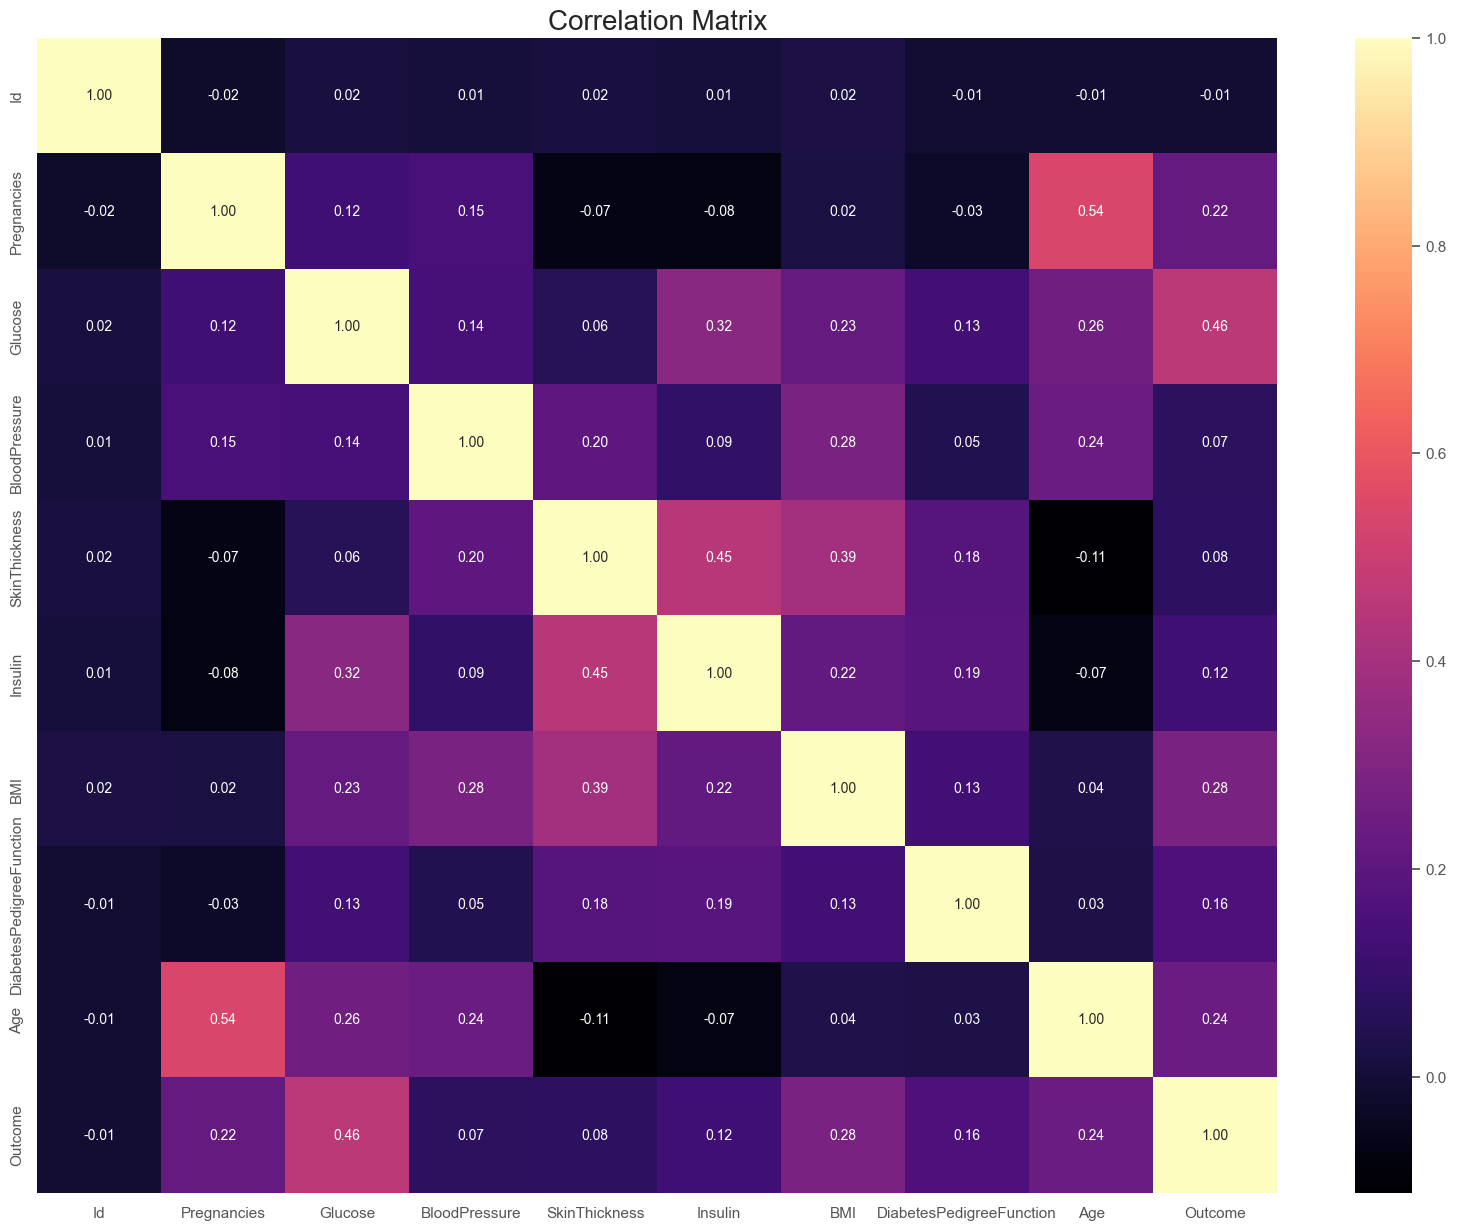

In [121]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='magma' )
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("corr.png", dpi=400)
plt.show()

## **Data Preprocessing**

## Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [122]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [123]:
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6    148.0           72.0           35.0      NaN  33.6   
1   2            1     85.0           66.0           29.0      NaN  26.6   
2   3            8    183.0           64.0            NaN      NaN  23.3   
3   4            1     89.0           66.0           23.0     94.0  28.1   
4   5            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [124]:
# Now, we can look at where are missing values
df.isnull().sum()

Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

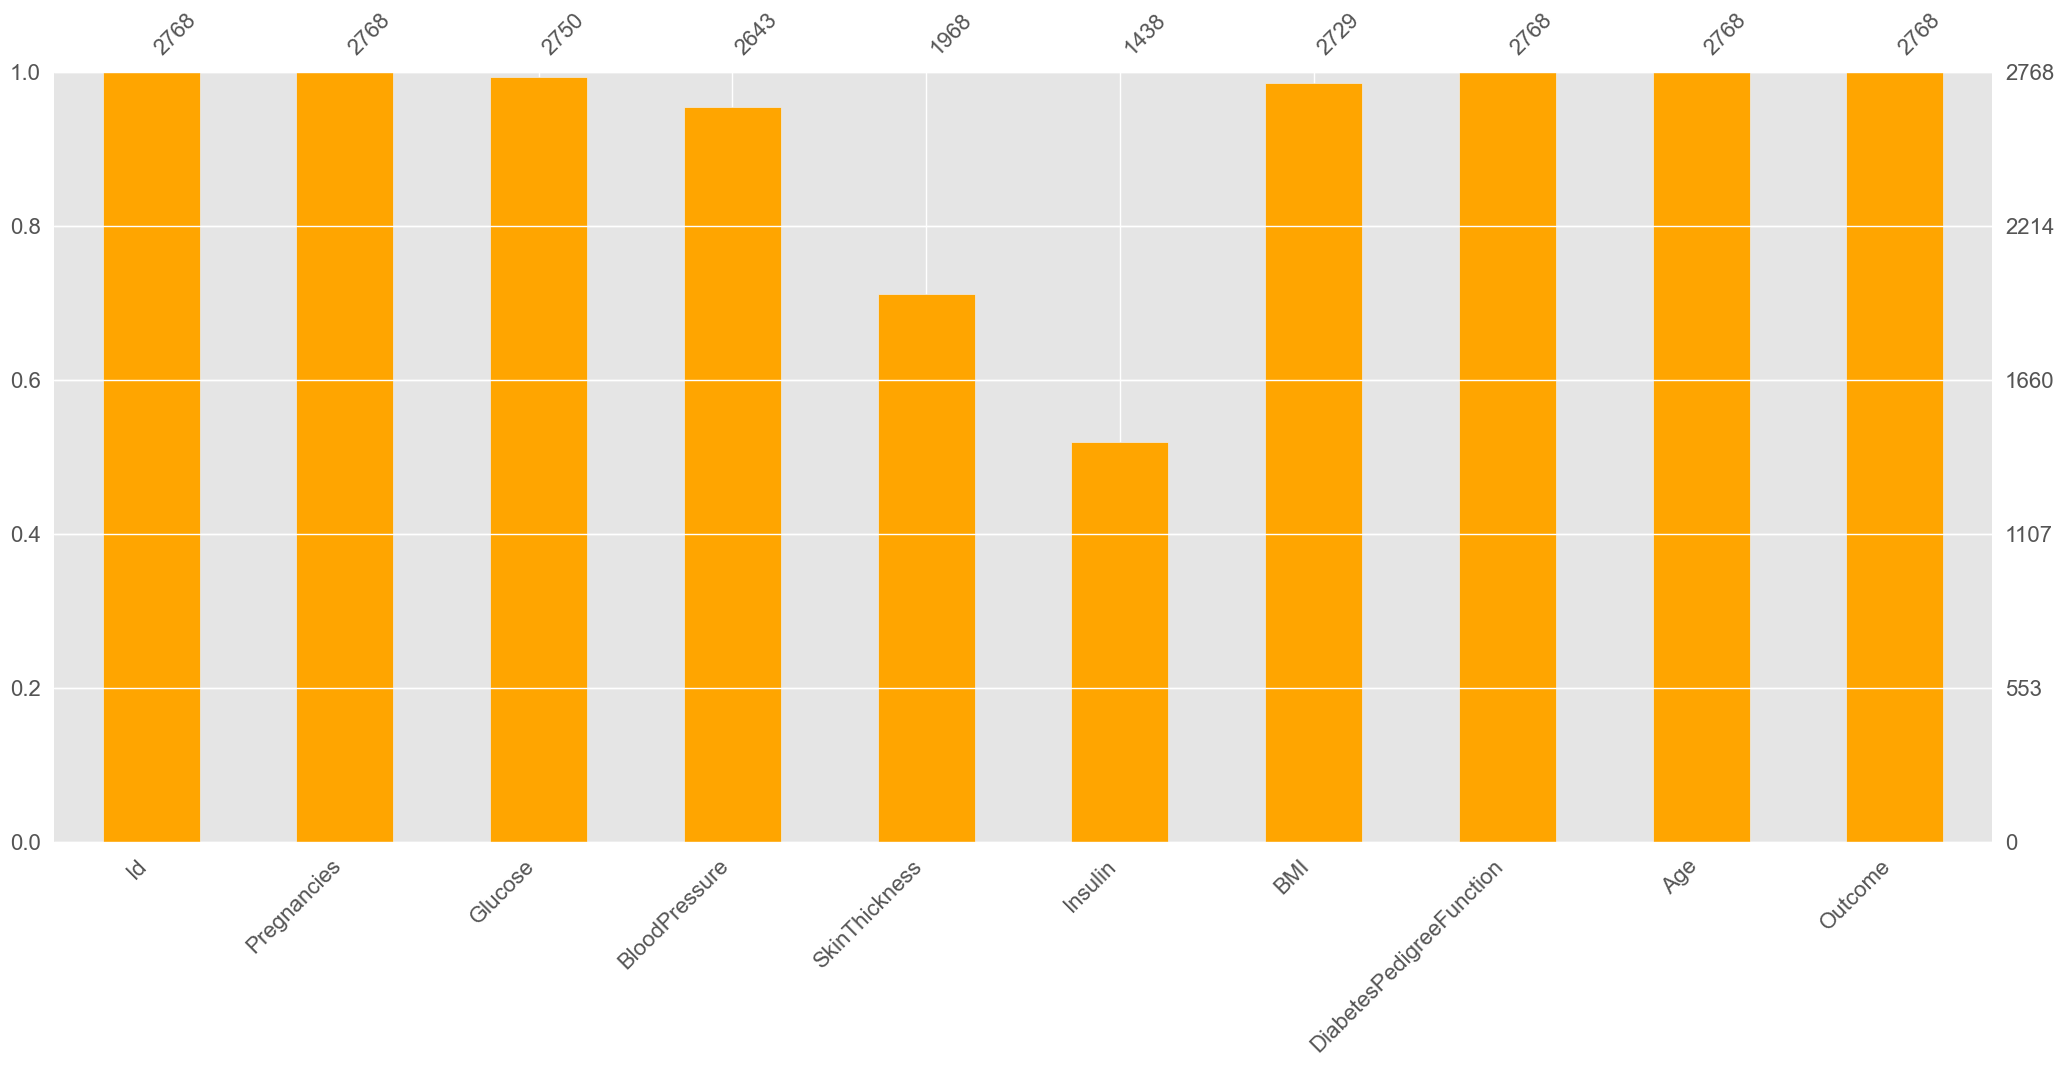

In [125]:
# Visualizing the missing observations using the missingno library
import missingno as msno
msno.bar(df, color="orange");

In [126]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [127]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [128]:
df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0  1.0            6    148.0           72.0           35.0    168.0  33.6   
1  2.0            1     85.0           66.0           29.0    105.0  26.6   
2  3.0            8    183.0           64.0           32.0    168.0  23.3   
3  4.0            1     89.0           66.0           23.0     94.0  28.1   
4  5.0            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [129]:
# Number of missing values
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pair plot for clean data

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

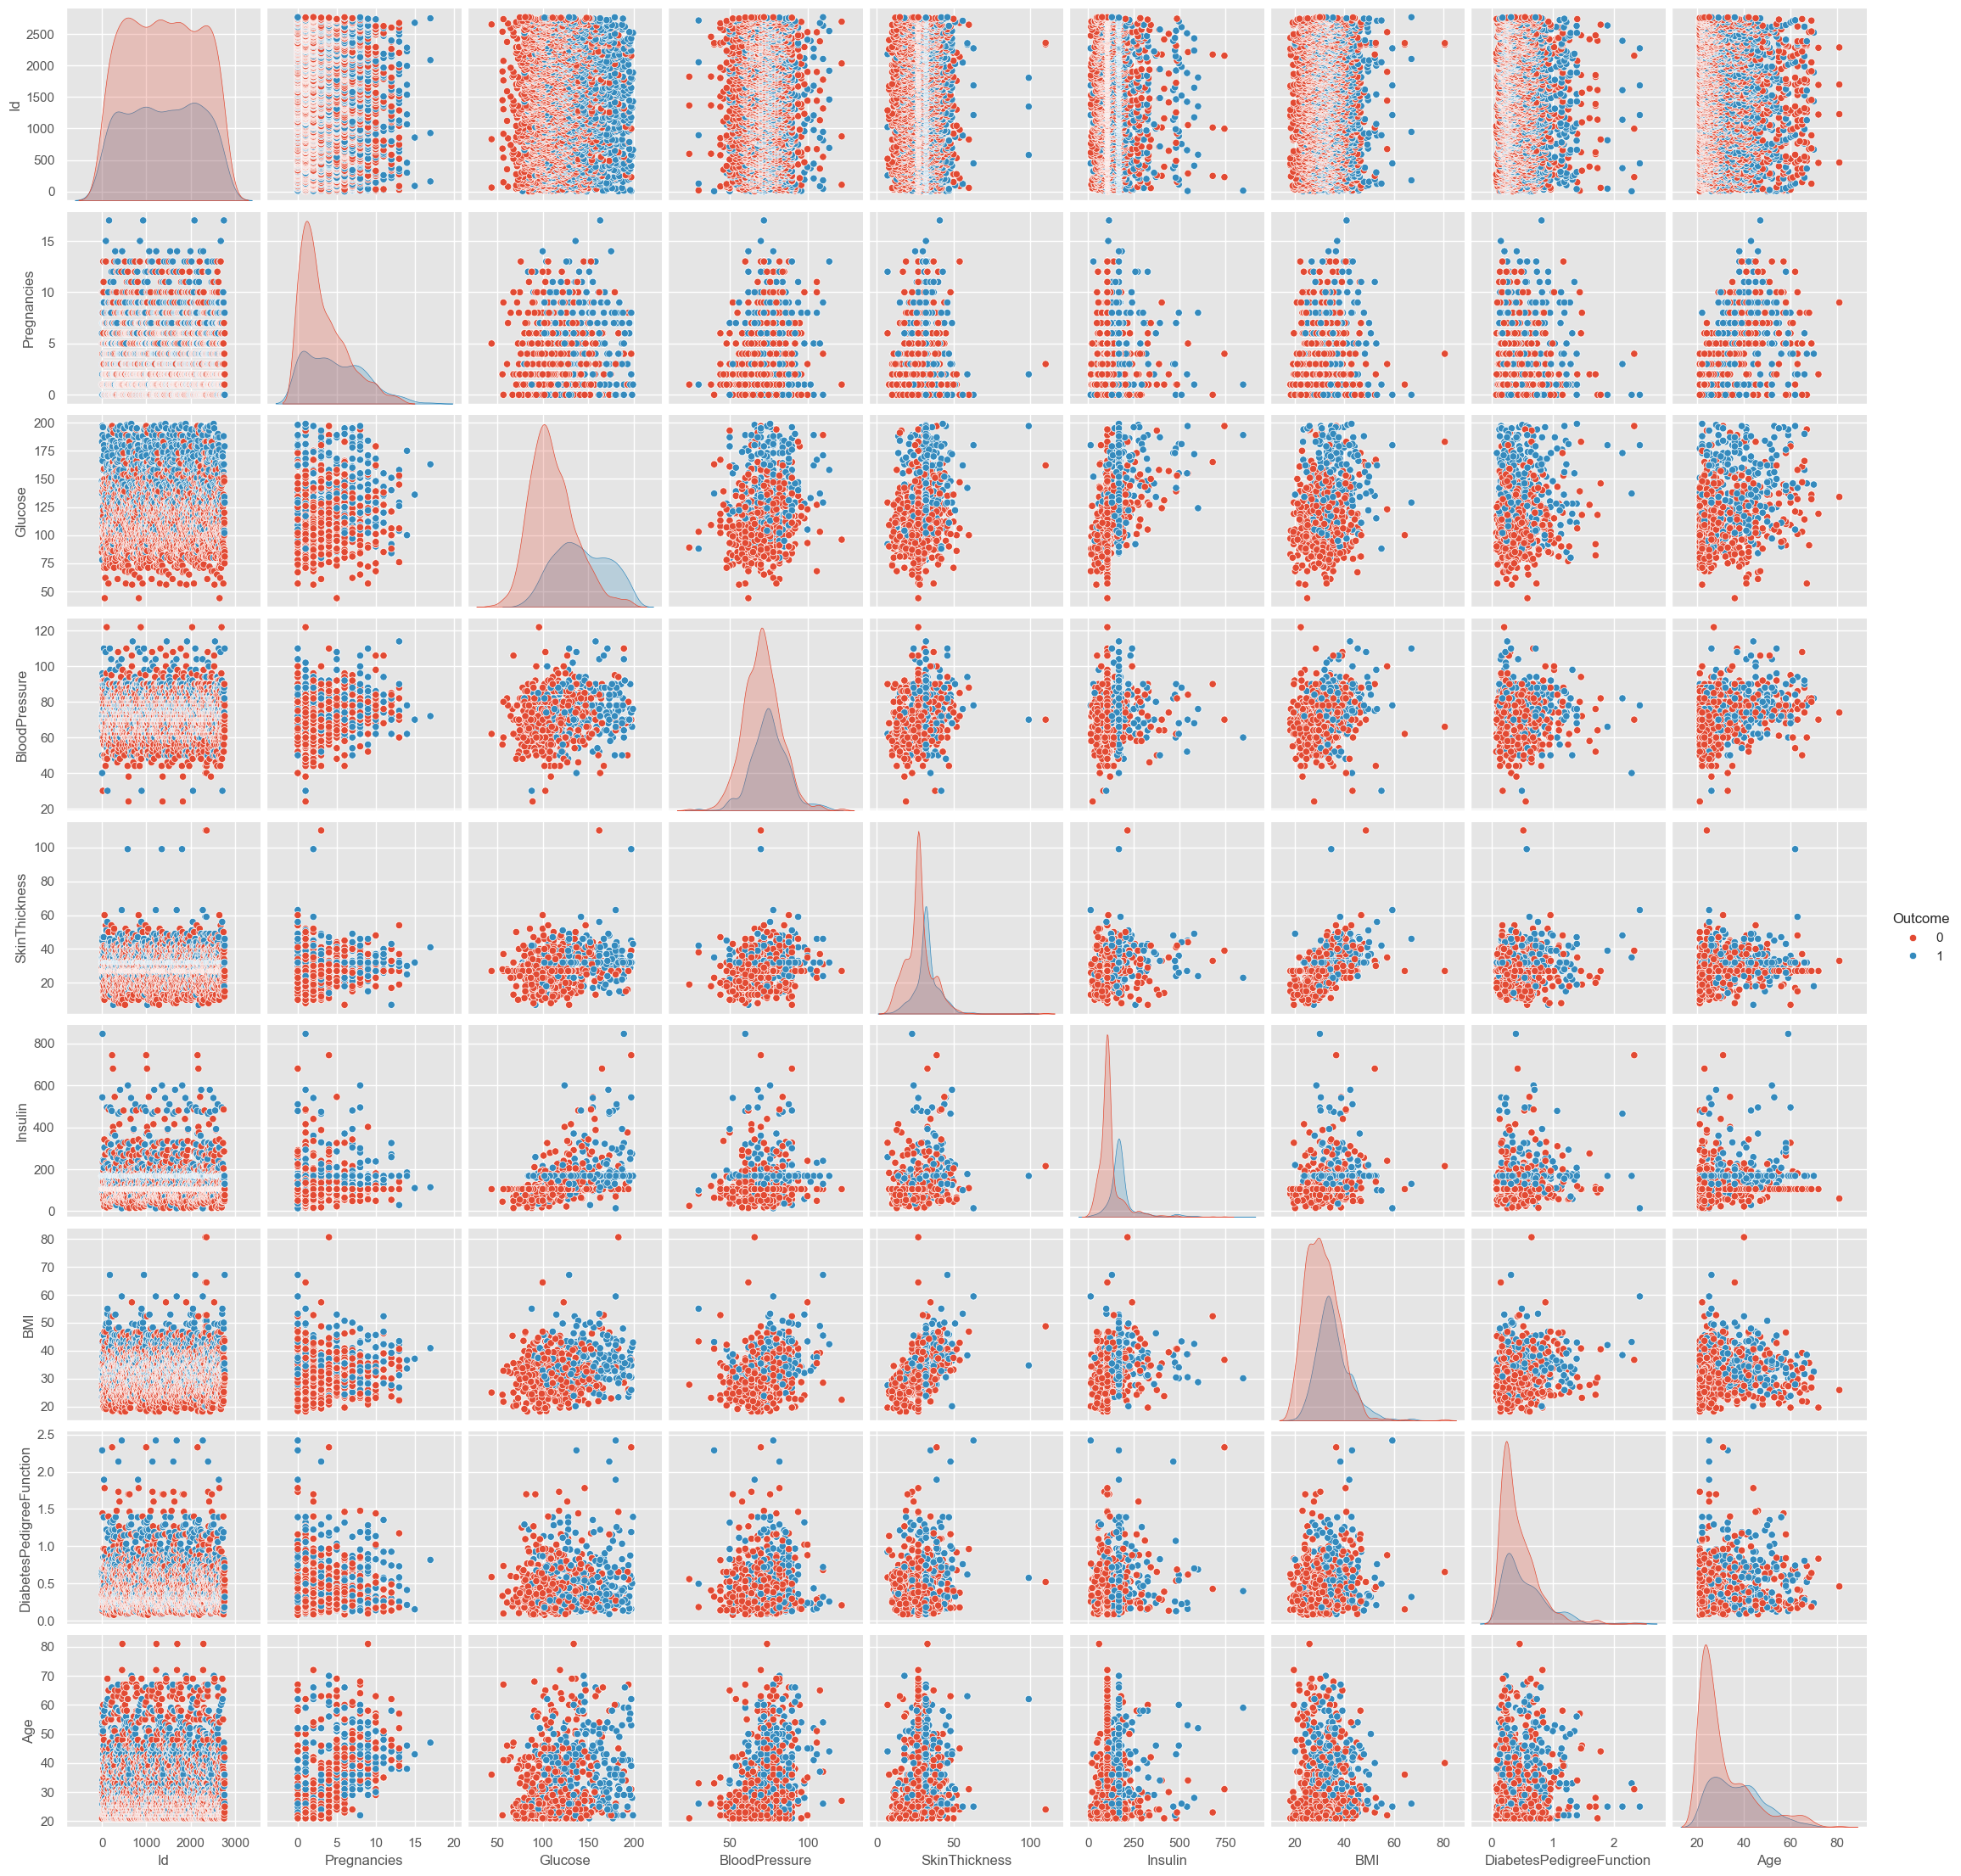

In [130]:
p=sns.pairplot(df, hue = 'Outcome')

## Outlier Observation Analysis

In [131]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Id no
Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


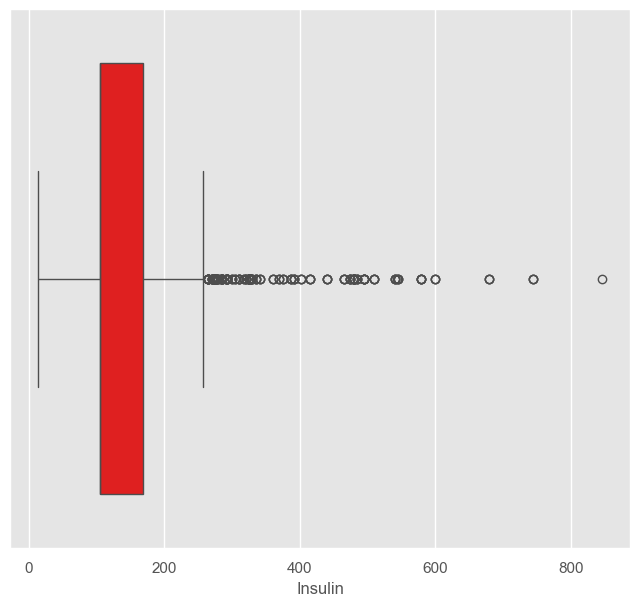

In [132]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

In [133]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

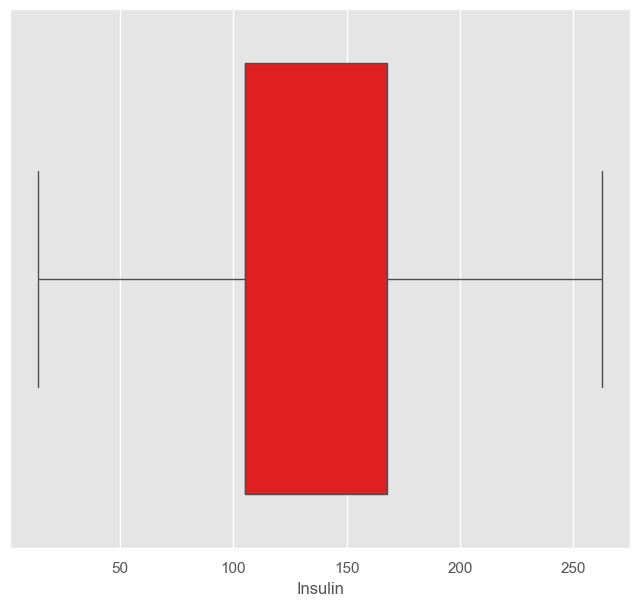

In [134]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

## Local Outlier Factor (LOF)

In [135]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [136]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.15180184, -2.15180184, -2.15025778, -2.1132225 , -1.74474948,
       -1.73732129, -1.73732129, -1.73348132, -1.69732568, -1.68972396,
       -1.68679567, -1.68679567, -1.67857898, -1.65804438, -1.65467703,
       -1.65040896, -1.64996009, -1.64853901, -1.64853901, -1.64853901,
       -1.64610935, -1.56772856, -1.56405643, -1.55640973, -1.55640973,
       -1.55640973, -1.54461975, -1.53923524, -1.51678367, -1.5099913 ])

In [137]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

np.float64(-1.733481320380554)

In [138]:
# Deleting those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [139]:
# Examining the size of the data.
df.shape

(2760, 10)

In [141]:
# splitting data into training and test set

# Target variable (Outcome is missing, so confirm if you have this column)
y = df["Outcome"]  

# Feature matrix: Drop 'Id' since it's not useful for predictions
X = df.drop(["Outcome", "Id"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#RF

In [142]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(
    criterion='entropy', 
    max_depth=15, 
    max_features='sqrt',  # Change 'auto' to 'sqrt'
    min_samples_leaf=2, 
    min_samples_split=3, 
    n_estimators=130
)

rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)
# confusion matrix

print(confusion_matrix(y_test, y_pred))
import pickle


0.9994824016563147
0.9963768115942029
[[540   0]
 [  3 285]]


In [143]:
# Assuming 'best_model' is your highest-performing model
model_path = "models/diabetes.pkl"

with open(model_path, "wb") as file:
    pickle.dump(rand_clf, file)

print(f"Model saved at {model_path}")

Model saved at models/diabetes.pkl


In [144]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       540
           1       1.00      0.99      0.99       288

    accuracy                           1.00       828
   macro avg       1.00      0.99      1.00       828
weighted avg       1.00      1.00      1.00       828



# LR

In [145]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [146]:
# model predictions

y_pred = log_reg.predict(X_test)

In [147]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.7971014492753623
0.8176328502415459


In [148]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[487  53]
 [ 98 190]]


In [149]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       540
           1       0.78      0.66      0.72       288

    accuracy                           0.82       828
   macro avg       0.81      0.78      0.79       828
weighted avg       0.81      0.82      0.81       828



# KNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
# model predictions 

y_pred = knn.predict(X_test)

In [152]:
# accuracy score

print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9611801242236024
0.9154589371980676


In [153]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[510  30]
 [ 40 248]]


In [154]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       540
           1       0.89      0.86      0.88       288

    accuracy                           0.92       828
   macro avg       0.91      0.90      0.91       828
weighted avg       0.92      0.92      0.92       828



# SVM

In [155]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [156]:
# best parameters

grid_search.best_params_

{'C': 20, 'gamma': 0.1}

In [157]:
# best score 

grid_search.best_score_

np.float64(0.9435875808330321)

In [158]:
svc = SVC(C = 1, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [159]:
# model predictions 

y_pred = svc.predict(X_test)

In [160]:
# accuracy score

print(accuracy_score(y_train, svc.predict(X_train)))

svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9182194616977226
0.9130434782608695


In [161]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[515  25]
 [ 47 241]]


In [162]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       540
           1       0.91      0.84      0.87       288

    accuracy                           0.91       828
   macro avg       0.91      0.90      0.90       828
weighted avg       0.91      0.91      0.91       828



# DT

In [163]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9963768115942029 

Confusion Matrix :- 
[[540   0]
 [  3 285]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       540
           1       1.00      0.99      0.99       288

    accuracy                           1.00       828
   macro avg       1.00      0.99      1.00       828
weighted avg       1.00      1.00      1.00       828



In [164]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 50, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [165]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.979379217273954


In [166]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9937888198757764
Test Accuracy of Decision Tree Classifier is 0.9903381642512077 

Confusion Matrix :- 
[[535   5]
 [  3 285]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       540
           1       0.98      0.99      0.99       288

    accuracy                           0.99       828
   macro avg       0.99      0.99      0.99       828
weighted avg       0.99      0.99      0.99       828



# GBDT

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [168]:
# best parameters 

grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

In [169]:
# best score

grid_search_gbc.best_score_

np.float64(0.9896560012819828)

In [170]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 180)
gbc.fit(X_train, y_train)

InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'deviance' instead.

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, gbc.predict(X_train)))

gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

1.0
0.8903508771929824


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[136  11]
 [ 14  67]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       147
           1       0.86      0.83      0.84        81

    accuracy                           0.89       228
   macro avg       0.88      0.88      0.88       228
weighted avg       0.89      0.89      0.89       228



# XGBoost

In [ ]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, xgb.predict(X_train)))

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9849624060150376
0.8771929824561403


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[132  15]
 [ 13  68]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       147
           1       0.82      0.84      0.83        81

    accuracy                           0.88       228
   macro avg       0.86      0.87      0.87       228
weighted avg       0.88      0.88      0.88       228



# Model Comparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
4      Random Forest Classifier  92.54
3      Decision Tree Classifier  89.47
5  Gradient Boosting Classifier  89.04
0           Logistic Regression  88.16
6                       XgBoost  87.72
2                           SVM  84.21
1                           KNN  83.33

In [ ]:
import pickle
model = rand_clf
pickle.dump(model, open("models/diabetes.pkl",'wb'))

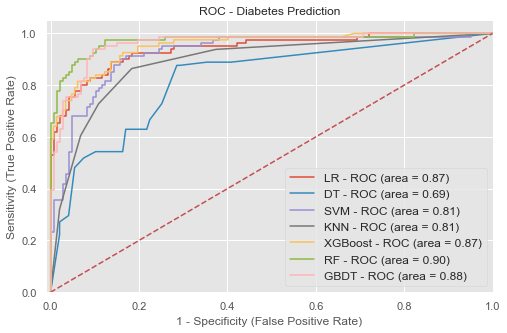

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("outputs/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[88.16000000000001, 89.47, 84.21, 83.33, 87.72, 92.54, 89.03999999999999]
[86.94, 75.88000000000001, 81.38, 80.97999999999999, 86.87, 90.49000000000001, 87.62]


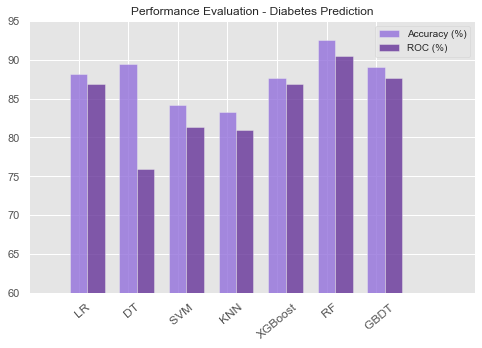

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dtc_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(ran_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("outputs/PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()